# Phase IV - INFO 2950
#### Luke Ellis

### Introduction

Music has long been a passion of mine, so my mind instantly focused on the analysis of music when the open-ended nature of this project was presented. Well I certainly do not regret choosing this topic, I do realize that it is much more difficult than initially expected. Like most art forms, Music is an extremely subjective field, and the more quantifiable parts of music present many computational challenges to obtain. For example, to create a large dataset of songs with their tempos (beats per minute) is a difficult task requiring a powerful computer and a lot of time. Or if one wished to classify the genre of 200,000 songs, they would run into issues of classification before they even start thinking of how to handle such a task computationally. Many songs do not simply and obviously fall into one category of music. Different listeners across different regions classify the same piece of music as different styles or genres. 

So for this project, I decided to not lose time by trying to solve a controversial aspect of music before even starting my analyses. Instead, I decided to use the Billboard Hot 100 Chart, with data over the past 60 or so years, as the centerpiece of my investigations. The Billboard Hot 100 is a weekly publication that lists the 100 most popular songs in the United States for that week based on a variety of factors, and this chart represents a significant part of the current musical culture of the United States. I believe finding new ways to quantify the chart may show correlations with other aspects of American culture and current events. An interesting way to quantify the Hot 100 is through the lyrics used in these songs. Thus, much of my analysis will consider trends in lyrics and American culture.

### Data Description

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from statistics import mean
from sklearn.linear_model import LinearRegression

In [5]:
songs = pd.read_csv("songsWithLyrics.csv")
songs.head()


,Unnamed: 0,WeekID,Week Position,Song,Performer,SongID,Peak Position,Weeks on Chart,lyricLink,lyrics,lyricBool
0,302681,2014-05-10,49,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,3,87,http://www.songlyrics.com/Imagine-Dragons/Radi...,i'm waking up to ash and dust i wipe my brow a...,True
1,302673,2014-03-22,45,Sail,AWOLNATION,SailAWOLNATION,17,79,http://www.songlyrics.com/AWOLNATION/Sail-lyrics,sail this is how i show my love. i made it in ...,True
2,278572,2009-10-10,48,I'm Yours,Jason Mraz,I'm YoursJason Mraz,6,76,http://www.songlyrics.com/Jason-Mraz/I'm-Yours...,well you done done me and you bet i felt it i ...,True
3,278565,1998-10-10,45,How Do I Live,LeAnn Rimes,How Do I LiveLeAnn Rimes,2,69,http://www.songlyrics.com/LeAnn-Rimes/How-Do-I...,how do i get through one night without you if ...,True
4,302643,2012-07-21,49,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock AnthemLMFAO Featuring Lauren Bennet...,1,68,http://www.songlyrics.com/LMFAO-Featuring-Laur...,party rock yeah woo let's go party rock is in ...,True


In [19]:
wordCt = pd.read_json("totalCount.json", typ='series')
wordCt.columns=['word', 'count']
uniqueCt = pd.read_json("totalCountNoDupes.json", typ='series')
uniqueCt.columns=['word', 'count']
print("totalCount.json first 5 values: \n", wordCt.head())
print()
print("totalCountNoDupes.json first 5 values: \n", uniqueCt.head())

totalCount.json first 5 values: 
        214146
you    211434
i      198497
the    183777
to     119939
dtype: object

totalCountNoDupes.json first 5 values: 
 the    19360
       18659
to     17956
and    17915
i      17557
dtype: object


#### Composition

This data is made up of one main CSV file and two JSON files with counts of word occurences in the collected lyrics.

**songsWithLyrics.csv**
This is based off another CSV file with all songs on the Billboard Hot 100 since the chart was first published. Billboard releases the list weekly with rankings based off of digital and physical sales of the song, streaming, and radio plays. The data set was clean and complete without significant outliers. The original "Hot Stuff" CSV file can be found <a href="https://data.world/kcmillersean/billboard-hot-100-1958-2017/workspace/file?filename=Hot+Stuff.csv">here.</a> The following reflects any changes I've made.
- **WeekID**: datetime; the date of the final week the song was on the charts.
- **Week Position**: int; the song's current ranking on WeekID's chart.
- **Song**: string; title of the song.
- **Performer**: string; the main musical artist(s) to whom this work is credited.
- **SongID**: string; string concatenation of Song+Performer (no space between)
- **Peak Position**: int; the highest position a song reached on the chart prior to or including the week of WeekID.
- **Weeks on Chart**: int; the amount of weeks the song has been on the chart in all time prior to and including the week of WeekID.
- **lyricLink**: string; the URL at which the song's lyrics were found.
- **lyrics**: string; a lower case string of all the words in a song with some special characters removed.
- **lyricBool**: boolean; True if the song has lyrics associated, False if lyrics were not able to be found for the song.

**totalCount.json**
This file contains a sorted list of words and how many times that word was found within lyrics of all the songs. It contains "duplicates", meaning if a song says the same word multiple times, it was counted that many times.

**totalCountNoDupes.json**
This file contains a sorted list of words and how many times that word was uniquely found within lyrics of all the songs. It contains no "duplicates", meaning a song that repeats a word multiple times only adds 1 to the total count of that word.

#### Motivation & Funding

The Billboard Hot 100 Chart is published weekly by Billboard Magazine, which is a division of Media Rights Capital Media & Info. While they do have financial interests in the publication of this magazine, the chart is still viewed as an "Industry Standard," and it is calculated based off of data collected from a wide variety of sources. It has stood the test of time as being an accurate depiction of the top musical landscape, and it is in Billboard's best interests to maintain the integrity of this chart.

#### Collection Process
All data used so far has not been collected from indivduals. They are all based on calculations with a variety of quantitative inputs. The Billboard Hot 100 is determined by an equation involving music sales, views, listens, and other popularity measurement sources. The lyrics were scraped from a well known website called <a href="http://www.songlyrics.com/">songlyrics.com</a>. I did some cleaning of the lyrics on my own.

#### Privacy Statement
No personal data has been collected from an individual at any point in this process. Human contributions to this data have only been data enterers working for either the Billboard or songlyrics.com. No data is at risk of being stolen as all of it is already in the public domain.

#### Link to Source Data

My Billboard CSV files and JSON files can be viewed and downloaded <a href="https://drive.google.com/drive/folders/18-B4ezkbxSrT1dcHwlP4DtKW29b6l3pa?usp=sharing">here.</a>


### Preregistration Statement

The two analyses I promised to perform during phase 3 of this project are as follows:
- A detailed count of the most common words to appear in songs on the Billboard Hot 100.
- An evaluation of the significance of political language being used in popular songs during U.S. presidential election years.

## Data Analysis

In [13]:
## Convert the WeekID Column to Datetime
songs.WeekID = pd.to_datetime(songs.WeekID, errors='ignore', infer_datetime_format=True) 

## A quick description of the 'songs' DataFrame shows that things are in order
songs.describe()

,Unnamed: 0,Week Position,Peak Position,Weeks on Chart
count,20622.000000,20622.000000,20622.000000,20622.000000
mean,190865.573708,75.921249,43.150131,12.154301
std,97155.530376,22.318413,30.345492,8.206884
min,7.000000,3.000000,1.000000,1.000000
25%,103777.000000,56.000000,15.000000,6.000000
50%,210911.000000,85.000000,40.000000,11.000000
75%,272583.750000,96.000000,69.000000,17.000000
max,327845.000000,100.000000,100.000000,87.000000


### Analysis #1 

My first (very basic) question is what are the most common lyrics in the most popular songs of our past?

This doesn't require much statistical analysis, but some Pandas maneuvering is necessary. After collecting frequency counts of all the words, I was unsurprised to discover that many of the top words were common articles, adverbs, and pronouns. I'm interested in learning the most common words of substance! So, I will remove those and show the results below.

In [51]:
## This list of boring words, inspired by https://www.thesaurus.com/e/writing/common-words/ 
boringWords = ['', 'the', 'a', 'an', 'when', 'now', 'how', 'also', 'not', 'as', 'up', 'here', 'there', 'so', 
               'very', 'i', 'you', 'your', 'he', 'she', 'them', 'they', 'their', 'her', 'him', 'me', 'my', 'we', 'it', 'its', 
               'our', 'these', 'this', 'that', 'those', 'who', 'what', 'which', 'all', 'just', 'even', 'many',
              'some', 'like', 'other', 'more', 'any', 'down', 'and', 'or', 'because', 'but', 'than', 'for', 'nor', 'at',
              'of', 'in', 'to', 'out', 'with', 'on', 'by', 'into', "i'm", "i'll", 'be', "don't", "can't", 'was', 'will', 'oh', 
               'is', 'are', 'do', "it's", 'yeah', 'can', 'get', 'if', "you're", 'have', 'yes', 'no', 'gonna', 'go', 'got', 
              'from', 'take', 'wanna', 'way', 'want', "ain't"]

## This data in dictionary form is a little easier to deal with
removedWords = wordCt.to_dict()
for word in boringWords:
    del removedWords[word]

print("The 20 most common non-filler words are: ")
for i in list(removedWords)[:20]:
    print(i, " : ", removedWords[i])

The 20 most common non-filler words are: 
love  :  54589
know  :  36682
baby  :  31111
one  :  19413
time  :  18354
come  :  18094
never  :  17596
let  :  16262
make  :  16148
say  :  16132
see  :  16130
girl  :  14831
back  :  13697
right  :  13274
need  :  12455
feel  :  12041
heart  :  11888
night  :  11863
tell  :  11719
little  :  10957


This first analysis is a pretty simple one, but it is quite important. This part of the project probably took the longest since the web scraping took a lot of trial and error as well as computing time. I would say the results here are not surprising, yet they are still interesting. Many of the top words words seem related to love, like "love", "baby", "girl", "feel", and "heart". This might suggest that love songs are more likely to earn a spot on to the Billboard Hot 100, or it could suggest that love songs are written very frequently. Unfortunately, there is no straightforward way to classify whether or not a song is about love. I also only have data on the most popular songs, so a full analysis on the the likelihood of romantic songs reaching the Hot 100 is not possible. However, another simple analysis may shed some light on this idea.

### Analysis #2 

This is a quick analysis to identify songs that use language related to love and their frequency over time.

In [105]:
## Words that very likely relate to love when used in lyrics
loveWords = ['love', 'baby', 'heart', 'crush', ' marr', 'romanc', 'romant', 'kiss', 'together', 'hand', 'honey', 'sex']

loveYrs = {}
loveYrsFreq = {}
totalLove = 0

# Initialize two dicts
for i in range(1958, 2022):
    loveYrs[i] = 0
    loveYrsFreq[i] = 0

# Find quantity of love songs
for index, row in songs.iterrows():
    tempYr = songs.loc[index, 'WeekID'].year
    tempLyrics = songs.loc[index, 'lyrics']
    
    loveYrsFreq[tempYr] = loveYrsFreq[tempYr] + 1
    
    found = False
    for word in loveWords:
        if not found:
            if word in tempLyrics:
                found = True
    if found:
        loveYrs[tempYr] = loveYrs[tempYr] + 1
        totalLove = totalLove + 1

# Calculate frequency of love songs in each year
for i in range(1958, 2022):
    loveYrsFreq[i] =  loveYrs[i] / loveYrsFreq[i]

# Print Results
print("Estimated love songs per year on chart: ")
print(loveYrs)
print()
print("Total frequency of songs with love language: ", round(totalLove / songs.shape[0], 3))


Estimated love songs per year on chart: 
{1958: 133, 1959: 270, 1960: 320, 1961: 353, 1962: 361, 1963: 334, 1964: 376, 1965: 388, 1966: 409, 1967: 380, 1968: 360, 1969: 375, 1970: 282, 1971: 300, 1972: 309, 1973: 274, 1974: 298, 1975: 294, 1976: 276, 1977: 265, 1978: 282, 1979: 303, 1980: 281, 1981: 271, 1982: 284, 1983: 282, 1984: 275, 1985: 268, 1986: 270, 1987: 272, 1988: 274, 1989: 284, 1990: 272, 1991: 247, 1992: 228, 1993: 209, 1994: 206, 1995: 208, 1996: 181, 1997: 176, 1998: 213, 1999: 227, 2000: 224, 2001: 208, 2002: 186, 2003: 195, 2004: 187, 2005: 206, 2006: 244, 2007: 238, 2008: 239, 2009: 270, 2010: 296, 2011: 281, 2012: 211, 2013: 221, 2014: 236, 2015: 229, 2016: 256, 2017: 217, 2018: 230, 2019: 55, 2020: 20, 2021: 28}

Total frequency of songs with love language:  0.793


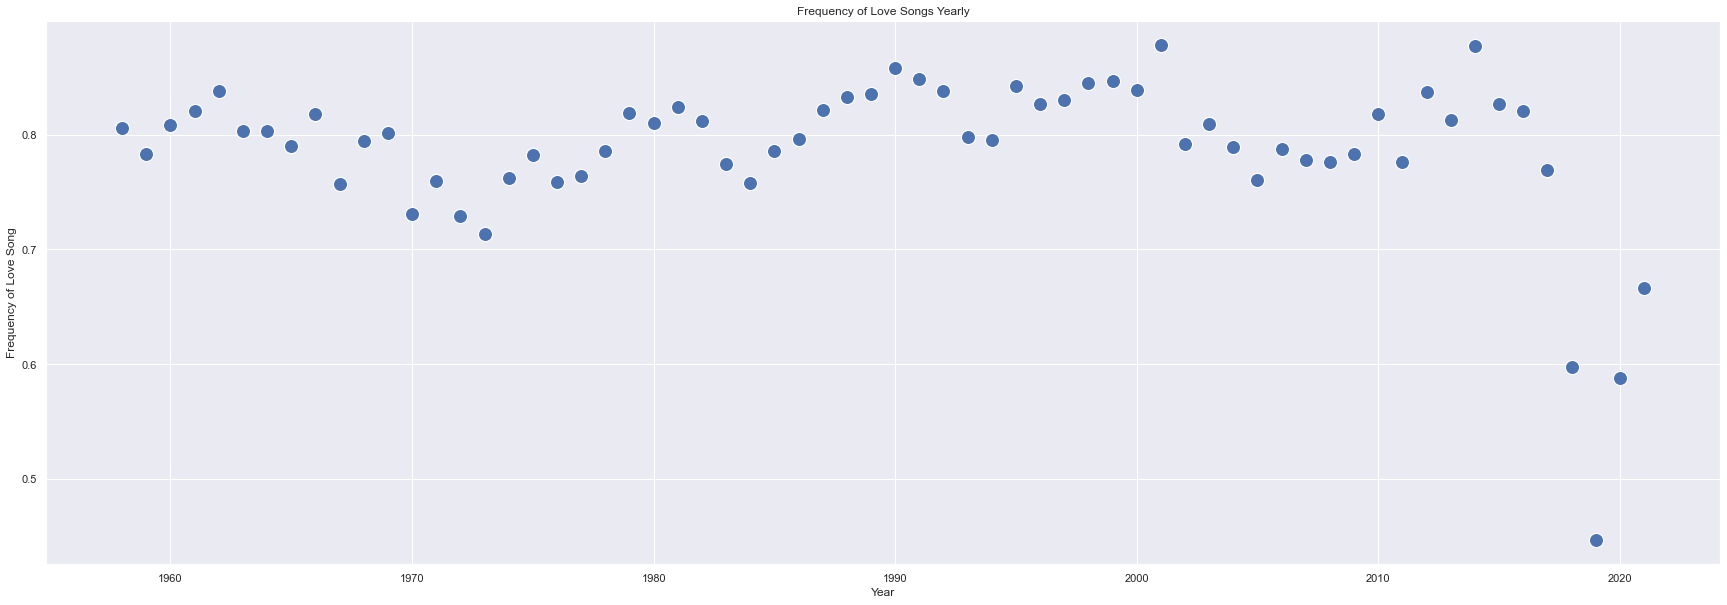

In [106]:
sns.scatterplot(x=loveYrsFreq.keys(), y=loveYrsFreq.values(), s=200).set(title="Frequency of Love Songs Yearly")
plt.xlabel("Year")
plt.ylabel("Frequency of Love Song")
plt.show()

It appears that around 80% of songs to ever get a spot on the Billboard Hot 100 use language related to love. Around the year 2020, there appears to be some sort of major drop off, and the reason for this is due to the lack of lyrics that could be scraped for more recent songs. The sample sizes are much smaller for recent years.

I will discuss the statistical significance of graph more in the evaluation of significance section.


### Analysis #3

This analysis uses similar methods as the last analysis to consider the use of political language in relation to U.S. presidential election years. Since the Billboard Hot 100 reflects the most popular songs in the United States, the music culture of the U.S. may fluctuate in relation to this major event that happens every 4 years.

In [85]:
electionYrs = [1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
# Word bases related to American politics, inspired by https://myvocabulary.com/word-list/politics-vocabulary/
americaWords = ['america', 'patriot', 'republic', 'democ', 'president', 'congress', 'vote', 'govern', 'politi', 
                'campaign', 'federa', 'ballot', 'candidate', ' election', ' liber', 'conserv', 'majority', 'minorit', 
                'corrupt', ' law ', 'bureau', 'equal', 'nominat', ' media ', 'amend', 'veto ', ' rights', 'freed', 'societ',
               'civi', ' nation']

In [160]:
politicsCounts = {}
politicsFreq = {}

# Initialize the politicsCounts dict
for i in range(1958, 2022):
    politicsCounts[i] = 0
    politicsFreq[i] = 0

# Count the amount of songs identified as being related to politics  
for index, row in songs.iterrows():
    tempYr = songs.loc[index, 'WeekID'].year
    tempLyrics = songs.loc[index, 'lyrics']
    
    politicsFreq[tempYr] = politicsFreq[tempYr] + 1
    
    found = False
    for word in americaWords:
        if not found:
            if word in tempLyrics:
                found = True
    if found:
        politicsCounts[tempYr] = politicsCounts[tempYr] + 1

# Calculate the frequencies
for i in range(1958, 2022):
    politicsFreq[i] = politicsCounts[i] / politicsFreq[i]

print(politicsCounts)

{1958: 4, 1959: 5, 1960: 9, 1961: 11, 1962: 11, 1963: 5, 1964: 11, 1965: 16, 1966: 18, 1967: 15, 1968: 16, 1969: 26, 1970: 27, 1971: 30, 1972: 24, 1973: 14, 1974: 23, 1975: 17, 1976: 19, 1977: 17, 1978: 12, 1979: 13, 1980: 17, 1981: 18, 1982: 26, 1983: 20, 1984: 15, 1985: 19, 1986: 24, 1987: 16, 1988: 13, 1989: 18, 1990: 14, 1991: 6, 1992: 19, 1993: 16, 1994: 15, 1995: 15, 1996: 22, 1997: 15, 1998: 15, 1999: 16, 2000: 22, 2001: 14, 2002: 14, 2003: 18, 2004: 20, 2005: 16, 2006: 25, 2007: 15, 2008: 20, 2009: 18, 2010: 23, 2011: 23, 2012: 14, 2013: 18, 2014: 15, 2015: 19, 2016: 19, 2017: 25, 2018: 37, 2019: 1, 2020: 2, 2021: 1}


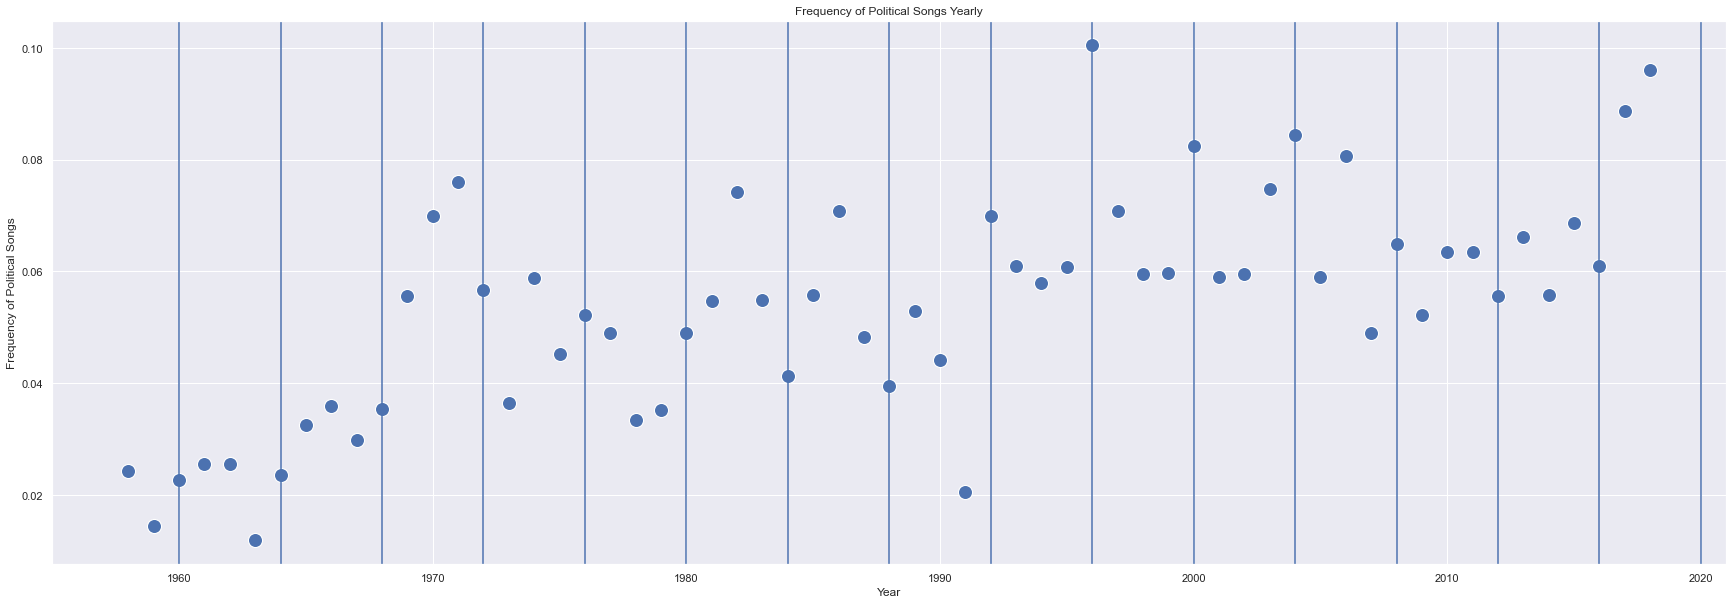

In [159]:
politicsGraph = sns.scatterplot(x=politicsFreq.keys(), y=politicsFreq.values(), s=200).set(title="Frequency of Political Songs Yearly")
for yr in electionYrs:
    plt.axvline(yr)
sns.set(rc={"figure.figsize": (30,10)})
plt.xlabel("Year")
plt.ylabel("Frequency of Political Songs")
plt.show()

In this graph, the dots represent the frequency of political songs in each year. The vertical lines show presidential election years. At first glance, there appears to be a slight upwards trend in the frequency of use of political language in popular songs. The same drop off in the past three years shows up, and this is again due to a smaller sample size (lyrics not being available on scraped website). I will also discuss this graph further in the next section.

## Evaluation of Significance

It doesn't really make sense to evaluate significance of Analysis #1 as it was simply just word counts. Analysis #2 and #3 though could have linear regressions fit to them.

### Analysis #2 Significance

In [107]:
## Removing recent year outliers from data (2019-2021), 2018 was an outlier for a different reason
loveCopy = loveYrsFreq
del loveCopy[2019]
del loveCopy[2020]
del loveCopy[2021]


In [145]:
loveDf = pd.DataFrame.from_dict(loveCopy, 'index', columns=['freq'])
yrList = []

for i in range(1958, 2019):
    yrList.append(i)
loveDf['year'] = yrList

loveTrend = LinearRegression()
loveTrend.fit(loveDf[['year']], loveDf['freq'])
print('Coefficient:', loveTrend.coef_)


Coefficient: [0.00020804]


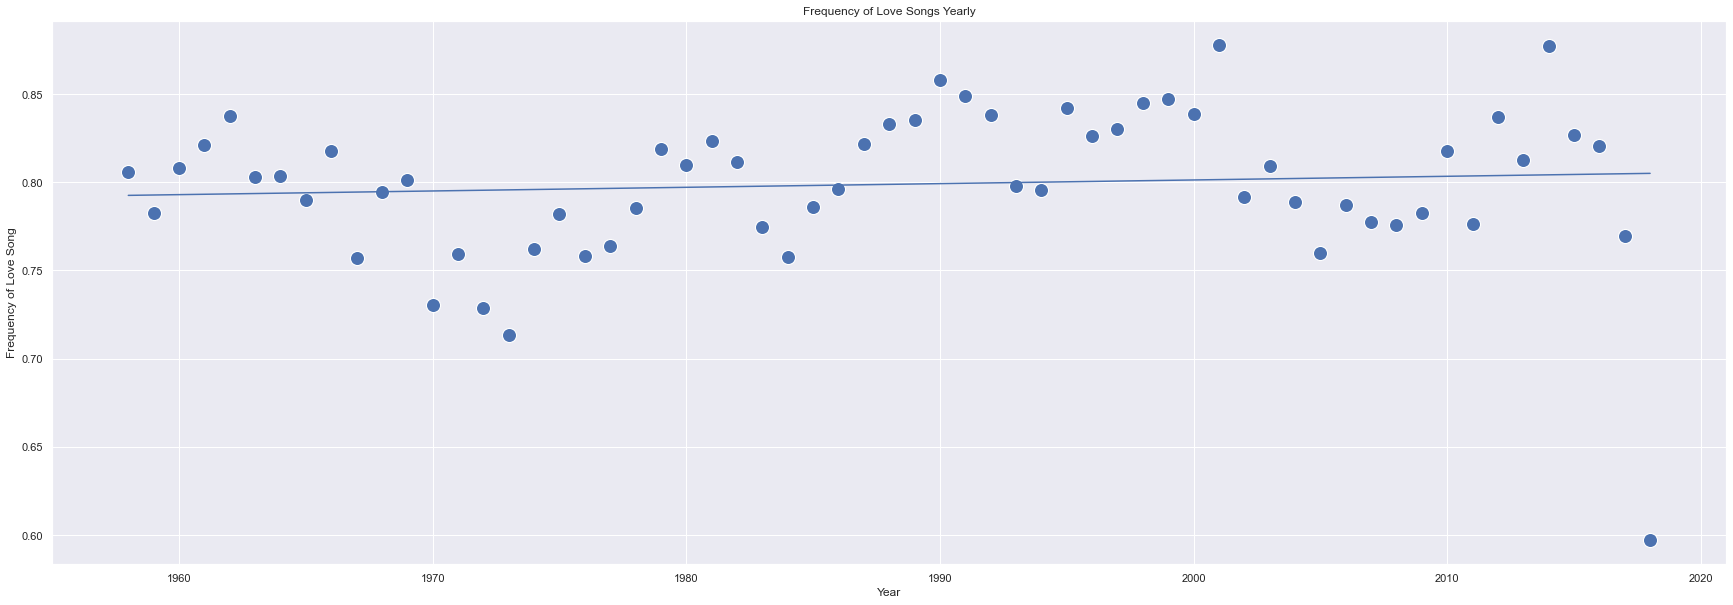

In [151]:
sns.scatterplot(x=loveCopy.keys(), y=loveCopy.values(), s=200).set(title="Frequency of Love Songs Yearly")
plt.xlabel("Year")
plt.ylabel("Frequency of Love Song")
plt.plot(loveDf['year'], loveTrend.predict(loveDf[['year']]))
plt.show()


In [149]:
loveDf[['year', 'freq']].corr()

,year,freq
year,1.000000,0.085304
freq,0.085304,1.000000


**Significance:** There appears to be a slightly positive slope, and the intercept is purposeless. The correlation of between these two variables is 0.085, which is nearly 0. There does not appear to be any significant correlation between years and frequency of love songs. The null hypothesis is not rejected.


## Analysis #3 Significance

This will follow a very similar process to the last one.

In [161]:
## Removing recent year outliers from data (2019-2021), 2018 was an outlier for a different reason
politicsCopy = politicsFreq
del politicsCopy[2019]
del politicsCopy[2020]
del politicsCopy[2021]

politicsDf = pd.DataFrame.from_dict(politicsCopy, 'index', columns=['freq'])
politicsDf['year'] = yrList

poliTrend = LinearRegression()
poliTrend.fit(politicsDf[['year']], politicsDf['freq'])
modelSlope = poliTrend.coef_
print('Coefficient:', modelSlope)

Coefficient: [0.00075208]


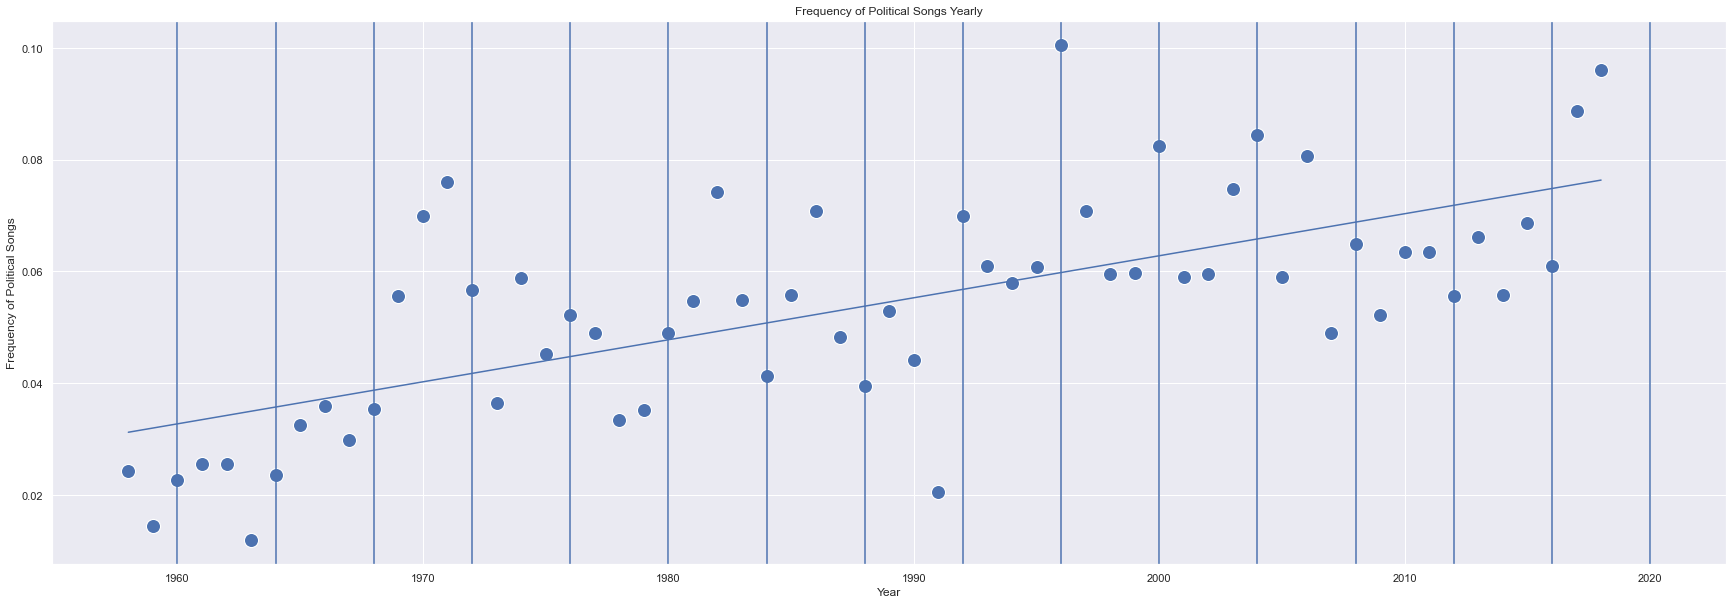

In [162]:
sns.scatterplot(x=politicsFreq.keys(), y=politicsFreq.values(), s=200).set(title="Frequency of Political Songs Yearly")
for yr in electionYrs:
    plt.axvline(yr)
sns.set(rc={"figure.figsize": (30,10)})
plt.plot(politicsDf['year'], poliTrend.predict(politicsDf[['year']]))
plt.xlabel("Year")
plt.ylabel("Frequency of Political Songs")
plt.show()

In [156]:
politicsDf[['year', 'freq']].corr()


,year,freq
year,1.000000,0.677881
freq,0.677881,1.000000


**Significance:** While the slope is also quite small for the regression between the two variables, the correlation may indicate significance. I will attempt to run a permutation test on the data to determine a p-value. 


In [157]:
def permute(data):
    toShuffle = data.copy().values
    np.random.shuffle(toShuffle)
    return pd.Series(toShuffle)

In [174]:
steeper = 0
n = 2000
slopes = np.zeros(n)

for i in range(n):
    temp = LinearRegression().fit(politicsDf[['year']], permute(politicsDf['freq']))
    slopes[i] = temp.coef_[0]
    if np.abs(temp.coef_[0]) > np.abs(modelSlope):
        steeper = steeper + 1

print("Calculated p-value: ", round(steeper / n, 3))


Calculated p-value:  0.0


Using a permutation test, I get a p-value of less than 0.001. This means there is a significant increase in the use of political language in music since the Billboard Hot 100 first started publishing data in 1958.


## Conclusions

As interesting as this data is, I would not feel comfortable declaring any conclusions. The interpretation of music is a very difficult problem that many have tried to simplify. I think it is safe to say that most people who have tried to simplify music like this have based their simplification on at least some valid reasoning. As a musician myself, I realize that part of the beauty of music lies in the fact that music can (and should) be interpreted in multiple ways. 

I tried to simplify song meaning down to the lyrics of the song and the frequencies of certain words. My method in doing this was by thinking of some common or important words within the language sets of romance and politics. While I'm sure this simplification can catch a large amount of songs related to these themes, it also misses those that use metaphors. This method can also falsely classify songs that use the word "love" or "baby" in a non-romantic way. With this simplification in mind, please take my conclusions with a grain of salt.

**Conclusion #1:** The most commonly used word of the Billboard Hot 100 (not including pronouns, conjunctions, articles, adverbs, or interjections) is `love`.

**Conclusion #2:** There is no significant change in the frequency of popular songs using romance-related language since the Billboard Hot 100 first started publishing data.

**Conclusion #3:** The frequency of politics-related language has a significant positive correlation between frequency and time passing since the Billboard Hot 100 first started publishing data (p < 0.001). That is, the usage of politics-related language has significantly increased since 1958.


## Limitations

Limitations of the original dataset: the original Billboard Hot 100 dataset was very clean and complete. Perhaps the biggest limitation was its size (>325,000 rows). The clunkiness of the data made reduction a necessity. Another limitation of this dataset was the lack of useful columns. All the columns were metadata (title, artist, week on chart, etc.) for the songs.  There were no artistic aspects that were measured (key, tempo, instrumentation, etc.), though anyone would be hard pressed to find complete data of this type for this many songs. 

Limitations of the dataset following the addition of lyrics: the introduction of lyrics to the dataset probably produced the most issues. The biggest was that the web scraping function could only find the lyrics for ~70% of the songs on the chart. While I treated this like a "random sample" of 70% of the chart, there is the possibility that it's not a truly random sample. As seen in the 2nd and 3rd analyses, the past three years seem to have much fewer found lyrics likely due to delayed data entry on the part of songlyrics.com. While there is a portion of the 30% missing songs that were instrumental, I highly doubt all of these were instrumental. While this project was focused on lyrical songs, instrumental songs on the Hot 100 were still popular and part of culture, so they should eventually be included in any overarching analysis of song meaning.


### Source Code
A GitHub Repository with all my code can be found <a href="https://github.com/ellisluke/2950FinalProject">here.</a> Note that the notebooks are a bit all over the place at the moment.

## Acknowledgments

This project would not have been possible without the following resources graciously provided by the following parties.
- Software Packages: 
    - <a href="https://www.python.org/">Python</a>
    - <a href="https://pandas.pydata.org/docs/#">Pandas</a>
    - <a href="https://numpy.org/doc/">NumPy</a>
    - <a href="https://scikit-learn.org/stable/index.html">Scikit-Learn</a>
    - <a href="https://matplotlib.org/">MatPlotLib</a>
    - <a href="https://seaborn.pydata.org/">Seaborn</a>
- Sean Miller - <a href="https://data.world/kcmillersean/billboard-hot-100-1958-2017">Cleaned Billboard Dataset</a>
- <a href="http://www.songlyrics.com/">Song Lyrics.com</a>
- Tutorial resources provided by INFO 2950: Introduction to Data Science at Cornell University, **Professor Matthew Wilkins** and the course staff
- Billboard Magazine - <a href="https://www.billboard.com/charts/hot-100/">Billboard Hot 100</a>
- Joel Grus - Data Science from Scratch Vol. 2
- MyVocabulary.com - <a href="https://myvocabulary.com/word-list/politics-vocabulary/">Political Vocabulary Word List</a>
- Thesaurus.com - <a href="https://www.thesaurus.com/e/writing/common-words/">100 of The Most Common Words in English</a>
- Daniela Rodriguez-Chavez - for helping me brainstorm solutions to issues regarding this project.
- Ben Dodson - for setting me on the correct trajectory during the web scraping portion.